In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel
from skimage.feature import greycomatrix, greycoprops


In [14]:
print(os.listdir("/content/drive/MyDrive/projet/kaggle"))

['test', 'train']


In [3]:
#Resize images to
SIZE = 128

# ***Methode GLCM***

In [ ]:


#Capturez des images et des labels dans des tableaux.
#Commencez par créer des listes vides.
train_images = []
train_labels = [] 

for directory_path in glob.glob("/content/drive/MyDrive/projet/kaggle/train/*"):
    label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, 0) #Lecture d'images couleur
        img = cv2.resize(img, (SIZE, SIZE)) #Resize images
        train_images.append(img)
        train_labels.append(label)
        
train_images = np.array(train_images)
train_labels = np.array(train_labels)


In [ ]:
#Faites exactement la même chose pour les images de test / validation
# test
test_images = []
test_labels = []

for directory_path in glob.glob("/content/drive/MyDrive/projet/kaggle/test/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
      try:
        img = cv2.imread(img_path, 0)
        img = cv2.resize(img, (SIZE, SIZE))
        test_images.append(img)
        test_labels.append(fruit_label)
      except:
        break    
test_images = np.array(test_images)
test_labels = np.array(test_labels)


In [ ]:
#Encoder les labels du texte (noms de dossier) en entiers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

#Diviser les données en ensembles de données de test et de train (déjà fractionnés mais attribués à une convention significative)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded


In [ ]:
x_train.shape

(1591, 128, 128)

In [ ]:
# Fonction d'extraction de fonctionnalités
# input shape is (n, x, y, c) - number of images, x, y, and channels
def feature_extractor(dataset):
    image_dataset = pd.DataFrame()
    for image in range(dataset.shape[0]):  #parcourir chaque fichier
        #print(image)
        
        df = pd.DataFrame()  #Trame de données temporaire pour capturer des informations pour chaque boucle.
        #Réinitialiser la trame de données à vide après chaque boucle.
        
        img = dataset[image, :,:]
    ################################################################
    #COMMENCER À AJOUTER DES DONNÉES AU DATAFRAME
  
                
         #Full image
      
        GLCM = greycomatrix(img, [1], [0])       
        GLCM_Energy = greycoprops(GLCM, 'energy')[0]
        df['Energy'] = GLCM_Energy
        GLCM_corr = greycoprops(GLCM, 'correlation')[0]
        df['Corr'] = GLCM_corr       
        GLCM_diss = greycoprops(GLCM, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss       
        GLCM_hom = greycoprops(GLCM, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom       
        GLCM_contr = greycoprops(GLCM, 'contrast')[0]
        df['Contrast'] = GLCM_contr


        GLCM2 = greycomatrix(img, [3], [0])       
        GLCM_Energy2 = greycoprops(GLCM2, 'energy')[0]
        df['Energy2'] = GLCM_Energy2
        GLCM_corr2 = greycoprops(GLCM2, 'correlation')[0]
        df['Corr2'] = GLCM_corr2       
        GLCM_diss2 = greycoprops(GLCM2, 'dissimilarity')[0]
        df['Diss_sim2'] = GLCM_diss2       
        GLCM_hom2 = greycoprops(GLCM2, 'homogeneity')[0]
        df['Homogen2'] = GLCM_hom2       
        GLCM_contr2 = greycoprops(GLCM2, 'contrast')[0]
        df['Contrast2'] = GLCM_contr2

        GLCM3 = greycomatrix(img, [5], [0])       
        GLCM_Energy3 = greycoprops(GLCM3, 'energy')[0]
        df['Energy3'] = GLCM_Energy3
        GLCM_corr3 = greycoprops(GLCM3, 'correlation')[0]
        df['Corr3'] = GLCM_corr3       
        GLCM_diss3 = greycoprops(GLCM3, 'dissimilarity')[0]
        df['Diss_sim3'] = GLCM_diss3       
        GLCM_hom3 = greycoprops(GLCM3, 'homogeneity')[0]
        df['Homogen3'] = GLCM_hom3       
        GLCM_contr3 = greycoprops(GLCM3, 'contrast')[0]
        df['Contrast3'] = GLCM_contr3

        GLCM4 = greycomatrix(img, [0], [np.pi/4])       
        GLCM_Energy4 = greycoprops(GLCM4, 'energy')[0]
        df['Energy4'] = GLCM_Energy4
        GLCM_corr4 = greycoprops(GLCM4, 'correlation')[0]
        df['Corr4'] = GLCM_corr4       
        GLCM_diss4 = greycoprops(GLCM4, 'dissimilarity')[0]
        df['Diss_sim4'] = GLCM_diss4       
        GLCM_hom4 = greycoprops(GLCM4, 'homogeneity')[0]
        df['Homogen4'] = GLCM_hom4       
        GLCM_contr4 = greycoprops(GLCM4, 'contrast')[0]
        df['Contrast4'] = GLCM_contr4
        
       
             
        #Ajouter des entités de l'image actuelle à l'ensemble de données
        image_dataset = image_dataset.append(df)
        
    return image_dataset

In [ ]:
#Extraire les fonctionnalités des images d'entraînement
image_features = feature_extractor(x_train)
X_for_ML =image_features
X_for_ML

,Energy,Corr,Diss_sim,Homogen,Contrast,Energy2,Corr2,Diss_sim2,Homogen2,Contrast2,Energy3,Corr3,Diss_sim3,Homogen3,Contrast3,Energy4,Corr4,Diss_sim4,Homogen4,Contrast4
0,0.021148,0.923607,7.712906,0.146253,128.188669,0.019150,0.857190,10.452438,0.105217,229.439687,0.018285,0.788336,12.756606,0.083811,329.848958,0.102875,1.0,0.0,1.0,0.0
0,0.019945,0.845927,11.457554,0.138873,346.449311,0.018800,0.811833,13.047438,0.112620,418.374187,0.018669,0.800108,13.688580,0.100382,443.527376,0.095447,1.0,0.0,1.0,0.0
0,0.028350,0.903942,6.558501,0.176576,106.092089,0.024419,0.760195,10.475062,0.121401,264.544438,0.022394,0.626111,13.297383,0.100181,414.006098,0.126532,1.0,0.0,1.0,0.0
0,0.076947,0.979907,9.925812,0.222372,259.530389,0.066477,0.966655,12.644438,0.193709,430.119188,0.061395,0.954491,14.707889,0.178237,586.180831,0.141742,1.0,0.0,1.0,0.0
0,0.025435,0.973981,5.112758,0.202034,55.452325,0.022096,0.942561,7.762688,0.141889,125.389438,0.020709,0.913020,9.725673,0.109351,194.218432,0.106239,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.023264,0.864277,7.664186,0.140635,116.394008,0.022774,0.823696,8.457563,0.132175,150.413187,0.022653,0.794422,9.035633,0.121184,175.598260,0.118316,1.0,0.0,1.0,0.0
0,0.063018,0.960328,10.036848,0.255573,288.428949,0.062675,0.953664,10.982438,0.241446,336.095563,0.062301,0.947342,11.721481,0.235879,380.985963,0.159253,1.0,0.0,1.0,0.0
0,0.054584,0.959870,9.122908,0.174733,184.966166,0.052943,0.949063,10.451625,0.158495,234.775625,0.051702,0.941860,11.261496,0.149685,267.830729,0.108903,1.0,0.0,1.0,0.0
0,0.016353,0.897551,11.871371,0.101469,346.950357,0.015925,0.875583,13.288813,0.091619,424.032062,0.015755,0.853554,14.537665,0.084056,503.593432,0.092847,1.0,0.0,1.0,0.0


In [ ]:
import lightgbm as lgb
 #Les noms de classe pour LGBM commencent à 0, donc réaffectant les étiquettes de 1,2,3,4 à 0,1,2,3
d_train = lgb.Dataset(X_for_ML, label=y_train)

# https://lightgbm.readthedocs.io/en/latest/Parameters.html
lgbm_params = {'learning_rate':0.05, 'boosting_type':'dart',    
                'objective':'multiclass',
                'metric': 'multi_logloss',
                'num_leaves':100,
                'max_depth':10,
                'num_class':3}  #nombre de valeurs uniques dans la classe cible n'incluant pas la valeur finale


lgb_model = lgb.train(lgbm_params, d_train, 100) #100 iterations. Increase iterations for small learning rates



#Prédire sur les données de test
#Extraire les fonctionnalités des données de test et les remodeler, tout comme les données d'entraînement
test_features = feature_extractor(x_test)
test_features = np.expand_dims(test_features, axis=0)
test_for_RF = np.reshape(test_features, (x_test.shape[0], -1))

#Prédire sur le test
test_prediction = lgb_model.predict(test_for_RF)
test_prediction=np.argmax(test_prediction, axis=1)
#Inversez le transform pour récupérer l'étiquette(label) d'origine. 
test_prediction = le.inverse_transform(test_prediction)

Accuracy  =   0.0
Precision =   0.0
Recall    =   0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


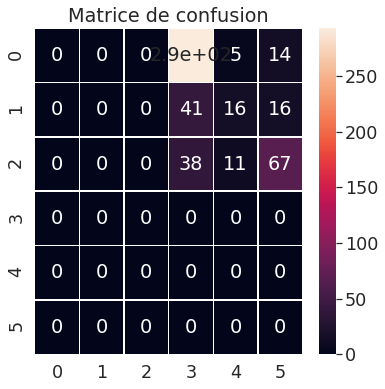

In [ ]:
from sklearn import metrics
print("Accuracy  =  ", metrics.accuracy_score(test_labels, test_prediction))
print("Precision =  ",metrics.precision_score(test_labels, test_prediction, average='macro'))
print("Recall    =  ", metrics.recall_score(test_labels, test_prediction, average='macro'))
#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_prediction)

fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)
plt.title('Matrice de confusion') 

plt.show()




/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:289: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The prediction for this image is:  ['/content/drive/MyDrive/projet/kaggle/train/Acne and Rosacea Photos']
The actual label for this image is:  /content/drive/MyDrive/projet/kaggle/test/Cellulitis Impetigo and other Bacterial Infections


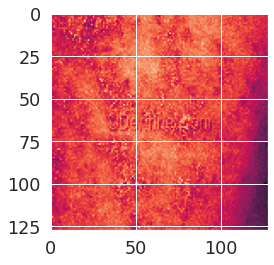

In [ ]:
#Vérifiez les résultats sur quelques images aléatoires
import random
n=random.randint(0, x_test.shape[0]-1) #Sélectionnez l'index de l'image à charger pour le test
img = x_test[n]
plt.imshow(img)

#Extraire des fonctions et remodeler aux bonnes dimensions
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor(input_img)
input_img_features = np.expand_dims(input_img_features, axis=0)
input_img_for_RF = np.reshape(input_img_features, (input_img.shape[0], -1))

#Predict
img_prediction = lgb_model.predict(input_img_for_RF)
img_prediction=np.argmax(img_prediction, axis=1)
img_prediction = le.inverse_transform([img_prediction])  #Inverser l'encodeur d'étiquette au nom d'origine
print("The prediction for this image is: ", img_prediction)
print("The actual label for this image is: ", test_labels[n])

# ***Methode KNN***

In [4]:
#Fonction qui convertie l'image en niveau de gris
def rgb2gray(I):
    r, g, b = I[:,:,0], I[:,:,1], I[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray
#Histogramme de couleurs
def histo(I):
    [nl,nc]=np.shape(I)
    h=np.zeros(256)
    I_m=np.around(I)
    for i in range(0,nl):
        for j in range(0,nc):
            h[int(I_m[i][j])]+=1
    return h 
#Fonction de distance euclidienne
def distance(x,y):
    d=np.sqrt(np.sum(np.power((x-y),2)))
    return d       

In [28]:
def KNN(index):
  I1 = cv2.imread(index) #Lecture d'images couleur
  I1 = cv2.resize(I1, (SIZE, SIZE))
  h1=histo(rgb2gray(I1))
  #Ajouter les distances dans un vecteur
 
  D=[]
  for directory_path in glob.glob("/content/drive/MyDrive/projet/kaggle/train/*"):
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        I2 = cv2.imread(img_path)
        I2 = cv2.resize(I2, (SIZE, SIZE))
        h2=histo(rgb2gray(I2))
        D.append((distance(h1, h2),img_path))
       
        
  # Trie    
  Dsort=sorted(D)
  T={}
  k=12
  m='Acne'
  n='Cellulitis'
  m1=m2=m3=0
  for i in range(k):
    if m in Dsort[i][1]:
      m1+=1
    elif n in Dsort[i][1]:
      m2+=1
    else :
      m3+=1
  T={'Acne':m1/k,'Cellulitis':m2/k,'Melanoma':m3/k}   
  return T

In [31]:
#Vérifiez les résultats sur quelques images aléatoires
#T1=KNN('/content/download.jpg')
T2=KNN('/content/drive/MyDrive/projet/kaggle/test/Cellulitis Impetigo and other Bacterial Infections/09cellulitis040306.jpg')
T3=KNN('/content/drive/MyDrive/projet/kaggle/test/Melanoma Skin Cancer Nevi and Moles/atypical-nevi-23.jpg')



In [30]:
print(T1)
print(T2)
print(T3)

{'Acne': 0.4166666666666667, 'Cellulitis': 0.25, 'Melanoma': 0.3333333333333333}


In [25]:
#Definire la precision du KNN en sommant les resultas pertinents
avg_prec=(T1['Acne']+T2['Cellulitis']+T3['Melanoma'])/3
print('Percision= ',avg_prec)

Percision=  0.3333333333333333


In [35]:
#Entrer d'image requête
index=input("Entrer l'url ")
KNN(index)

Entrer l'url /content/download.jpg


{'Acne': 0.25,
 'Cellulitis': 0.3333333333333333,
 'Melanoma': 0.4166666666666667}

# ***Histogramme***

In [ ]:
mat_image_train=np.zeros((SIZE,SIZE,1591))
j=0              
for directory_path in glob.glob("/content/drive/MyDrive/projet/kaggle/train/*"):
  for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
    I2 = cv2.imread(img_path)
    I2 = cv2.resize(I2, (SIZE, SIZE))
    mat_image_train[:,:,j]=rgb2gray(I2)
    j+=1          

In [ ]:
mat_image_test=np.zeros((SIZE,SIZE,501))
j=0              
for directory_path in glob.glob("/content/drive/MyDrive/projet/kaggle/test/*"):
  for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
    I2 = cv2.imread(img_path)
    I2 = cv2.resize(I2, (SIZE, SIZE))
    mat_image_test[:,:,j]=rgb2gray(I2)
    j+=1     

In [ ]:
def stocker_desc(mat_image):
    nl,nc,nbr_img=mat_image.shape
    desc=np.zeros((nbr_img,256))
    for i in range(nbr_img):
        desc[i,:]=histo(mat_image[:,:,i])
    return desc

In [ ]:
mat_desc_train=stocker_desc(mat_image_train)
mat_desc_test=stocker_desc(mat_image_test)
print(mat_desc_train)
print(mat_desc_test)

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 8. 17. 19. ...  0.  0.  0.]
 [ 0.  1.  3. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 8. 17. 19. ...  0.  0.  0.]
 [ 0.  1.  3. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


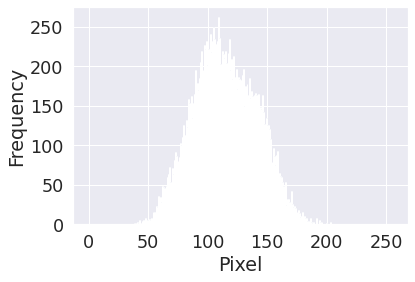

In [ ]:
hist=mat_desc_train[0,:]
pixel=np.arange(len(hist))
plt.bar(pixel,hist,alpha=1)
plt.xlabel('Pixel')
plt.ylabel('Frequency')
plt.show()

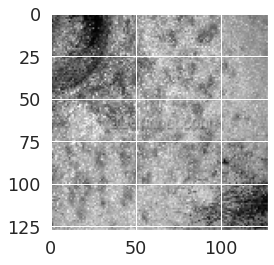

In [ ]:
I=plt.imshow(mat_image_train[:,:,5],cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
def stock_dist(mat_desc_train,mat_desc_test,nbr_im):
    mat_dist=np.zeros((nbr_im,nbr_im))
    for i in range(nbr_im):
        for j in range(nbr_im):
            mat_dist[i][j]=distance(mat_desc_train[i],mat_desc_test[j])
    return mat_dist  

In [ ]:
dist=stock_dist(mat_desc_test,mat_desc_train,501)
print(dist)

[[   0.          994.65370858  892.93784778 ... 1705.47530032
  1469.08474909 1111.27404361]
 [ 994.65370858    0.         1698.55467972 ... 2280.01491223
  1881.19855411 1823.76533578]
 [ 892.93784778 1698.55467972    0.         ... 1422.46687132
  1441.87863567  883.35723238]
 ...
 [1705.47530032 2280.01491223 1422.46687132 ...    0.
   890.80076336 1219.62125268]
 [1469.08474909 1881.19855411 1441.87863567 ...  890.80076336
     0.         1253.80620512]
 [1111.27404361 1823.76533578  883.35723238 ... 1219.62125268
  1253.80620512    0.        ]]


In [ ]:
mat_indx=np.argsort(dist,axis=1)
mat_indx

array([[  0, 371, 209, ..., 323, 328, 111],
       [  1, 149, 331, ..., 323, 328, 111],
       [  2,  69, 179, ..., 323, 328, 111],
       ...,
       [498,  58, 133, ..., 323, 328, 111],
       [499, 308, 133, ..., 323, 328, 111],
       [500, 395,  93, ..., 323, 328, 111]])

In [ ]:
def stocke_pert(mat_index):
    l,c=np.shape(mat_index)
    matr_pertinence=np.zeros((l,c))
    for i in range(l):
        for j in range(c):
            if i//5==mat_index[i,j]//5:
                matr_pertinence[i,j]=1    
    return matr_pertinence

In [ ]:
mat_indb=stocke_pert(mat_indx)
mat_indb

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [ ]:
def rappel_precision(mat_pert):
    l,c=np.shape(mat_pert)
    rappel_precision=np.zeros((l,c) ,dtype='O')
    for i in range(l):
        for j in range(c):
            if mat_pert[i,j]==1:
                rappel=np.sum(mat_pert[i,:j+1])/3
                precision=np.sum(mat_pert[i,:j+1])/(j+1)
                rappel_precision[i,j]=(rappel,precision)
            else:
                if j==0:
                    rappel_precision[i,j]=(0,0)
                else:
                    rappel_precision[i,j]=rappel_precision[i,j-1]
    return rappel_precision

In [ ]:
rec=rappel_precision(mat_indb)
rec

array([[(0.3333333333333333, 1.0), (0.3333333333333333, 1.0),
        (0.3333333333333333, 1.0), ...,
        (1.6666666666666667, 0.029940119760479042),
        (1.6666666666666667, 0.029940119760479042),
        (1.6666666666666667, 0.029940119760479042)],
       [(0.3333333333333333, 1.0), (0.3333333333333333, 1.0),
        (0.3333333333333333, 1.0), ...,
        (1.6666666666666667, 0.019305019305019305),
        (1.6666666666666667, 0.019305019305019305),
        (1.6666666666666667, 0.019305019305019305)],
       [(0.3333333333333333, 1.0), (0.3333333333333333, 1.0),
        (0.3333333333333333, 1.0), ...,
        (1.6666666666666667, 0.013192612137203167),
        (1.6666666666666667, 0.013192612137203167),
        (1.6666666666666667, 0.013192612137203167)],
       ...,
       [(0.3333333333333333, 1.0), (0.3333333333333333, 1.0),
        (0.3333333333333333, 1.0), ...,
        (1.6666666666666667, 0.01059322033898305),
        (1.6666666666666667, 0.01059322033898305),
       

In [ ]:
def average_precision(mat):
    l,c=np.shape(mat_indb)
    av_pre=np.zeros((l))
    for i in range(l):
        av_pre[i]=mat[i,0][1]
        for j in range(1,c):
            if mat[i,j][0]!=mat[i,j-1][0]:
                av_pre[i]+=mat[i,j][1]
    av_pre/=3
    return av_pre

In [ ]:
average_precision(rec)

array([0.37657784, 0.38098837, 0.35964888, 0.36145969, 0.37732218,
       0.36703366, 0.43191952, 0.40849771, 0.35241708, 0.41506655,
       0.3534523 , 0.35476669, 0.35028628, 0.37502535, 0.3616122 ,
       0.35941316, 0.42923844, 0.34808948, 0.34430809, 0.34490095,
       0.60930362, 0.40721716, 0.35515099, 0.53442786, 0.3959436 ,
       0.36533288, 0.35684822, 0.35254174, 0.39818296, 0.35510627,
       0.38449074, 0.4163935 , 0.34974963, 0.35104063, 0.34386832,
       0.35334416, 0.35328747, 0.36105764, 0.36266822, 0.39384232,
       0.39040406, 0.34988569, 0.38070308, 0.39934469, 0.41023644,
       0.37393544, 0.3840156 , 0.35031777, 0.49511963, 0.69452053,
       0.3785848 , 0.34814492, 0.34561518, 0.36194139, 0.3548096 ,
       0.35220002, 0.38047628, 0.37872877, 0.36552187, 0.34899997,
       0.37375333, 0.3584871 , 0.38493082, 0.36724156, 0.36939521,
       0.43953263, 0.39920442, 0.40974046, 0.35817831, 0.38150417,
       0.47712048, 0.34750907, 0.39558865, 0.34812162, 0.34605